#### Any Doubt in Classification

### Recommadation

    i/p -> item1
    o/p -> item2, item3, item4, item5 (realted or similar to item1)

__Fraud Detection__

    Logistic Regression
    
        Without Normalization - Accuracy was 99.90 %
        
        With Normalization - Accuracy was 99.92 % (Sensitivity, False Negative, Recall has increased)
    

Sensitivity, False Negative a `Fraud` classified as `Not Fraud`

`Cross Validation`
        

__step1__ Data Collections

IMDB, SOCIAL ratings and reviews -> raw data -> preprocess -> store --> ml model

In [2]:
!ls ml-100k/

README
allbut.pl
mku.sh
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test


u.data

             The full u data set, 100000 ratings by 943 users on 1682 items.
              
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC   

In [6]:
!head ml-100k/u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013


In [7]:
import pandas as pd

In [12]:
u_data = pd.read_csv('ml-100k/u.data', header=None,names=['user_id', 'movie_id', 'rating' ],
                     sep='\t', usecols=[0, 1, 2])

In [13]:
u_data.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


### Highest rated movie

In [23]:
import matplotlib.pyplot as plt

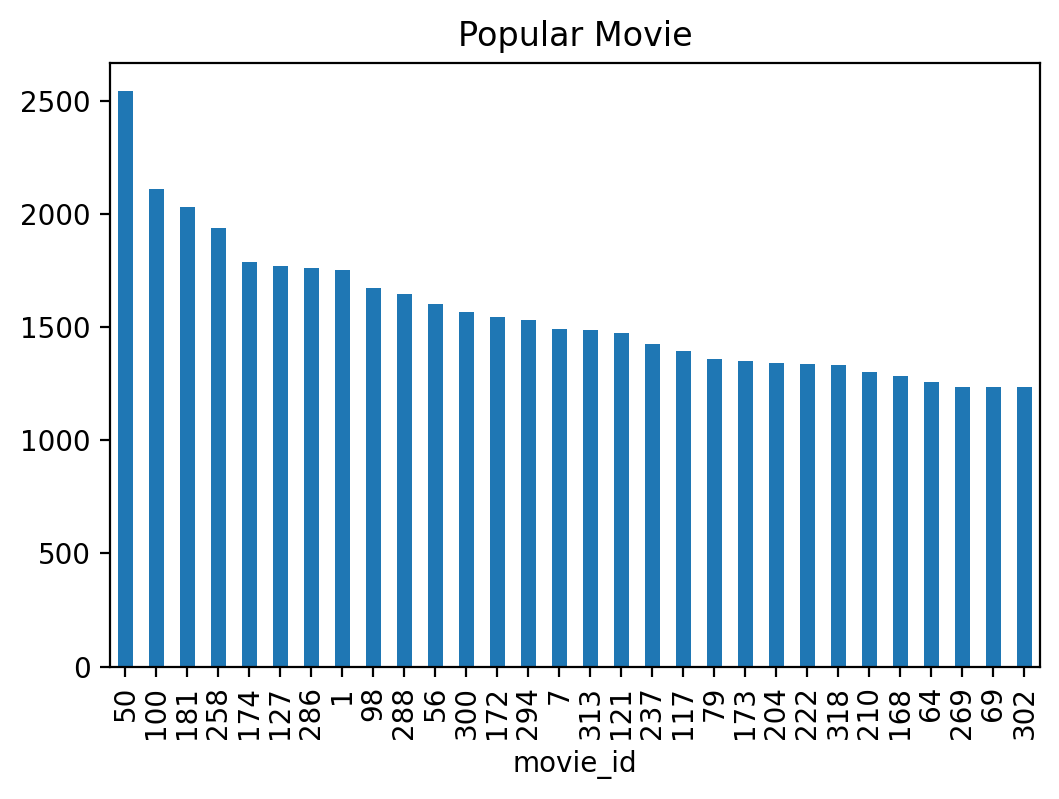

In [27]:
fig, ax = plt.subplots(dpi=200)
plt.title('Popular Movie')
u_data.groupby('movie_id')['rating'].sum().sort_values(ascending=False)[:30].plot(kind='bar')
plt.show()

In [28]:
u_data.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [35]:
most_viewed = u_data.groupby('movie_id')['user_id'].count().sort_values(ascending=False)[:30]

In [36]:
import seaborn as sns

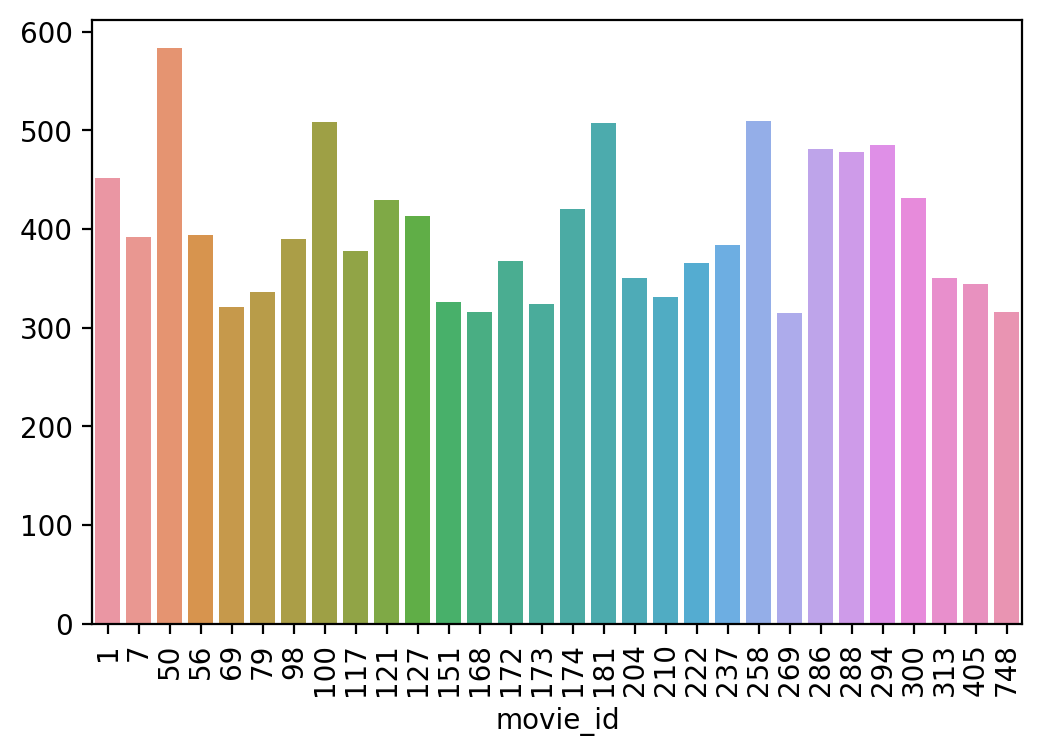

In [38]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(most_viewed.index, most_viewed.values, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [41]:
less_viewed = u_data.groupby('movie_id')['user_id'].count().sort_values()[:30]

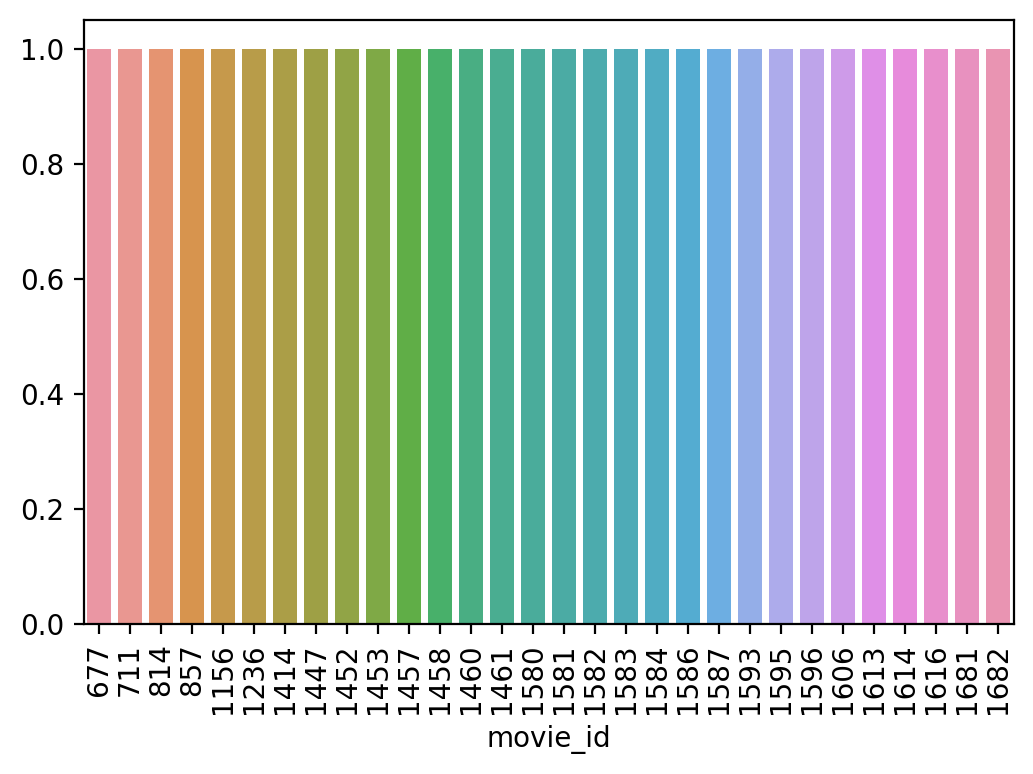

In [42]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(less_viewed.index, less_viewed.values, ax=ax)
plt.xticks(rotation=90)
plt.show()

    hmm by exploring this data i come at  a conclusion that i can not use avg rating directly

In [43]:
most_viewed = u_data.groupby('movie_id')['user_id'].count()

In [45]:
most_viewed.describe()

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: user_id, dtype: float64

### highly scattered data so wee need a good thresh hold value

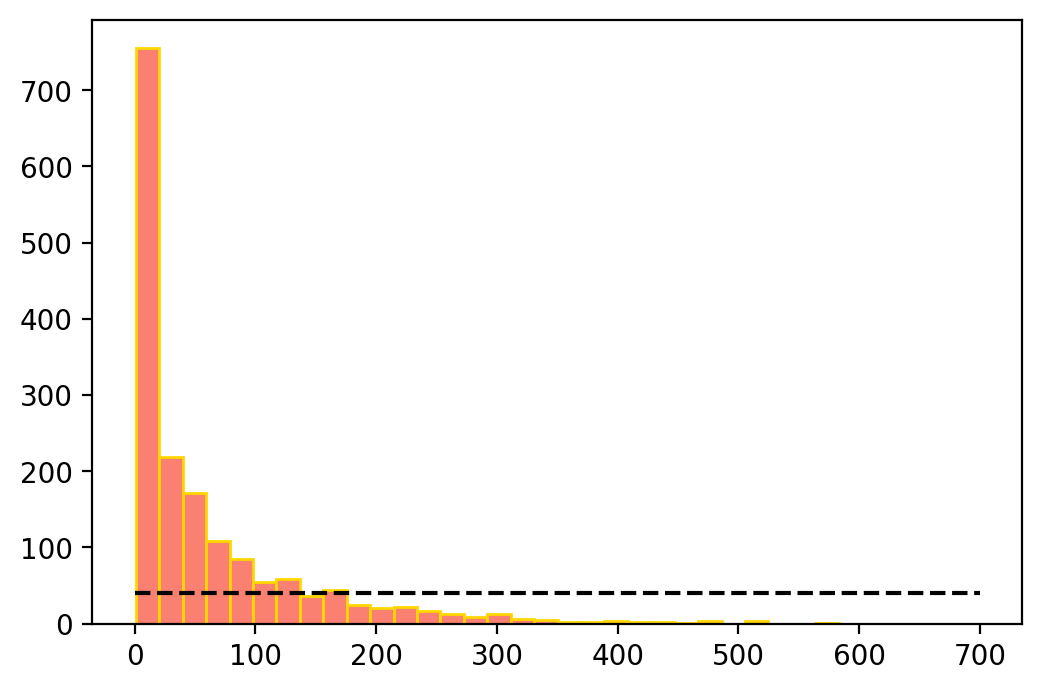

In [53]:
plt.figure(dpi=200)
plt.hist(most_viewed, bins=30, color='salmon', ec='gold')
plt.plot([0, 700], [40, 40], 'k--')
plt.show()

In [56]:
u_data

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [59]:
df = u_data.set_index('movie_id').drop('user_id', axis=1)

In [60]:
df.head()

,rating
movie_id,
242,3
302,3
377,1
51,2
346,1


In [64]:
import numpy as np

In [66]:
df1 = u_data.groupby('movie_id').agg({'user_id': np.size})

In [67]:
df1.head()

,user_id
movie_id,
1,452
2,131
3,90
4,209
5,86


In [72]:
df1.shape

(1682, 1)

In [75]:
df1 = df1[df1['user_id']>25]

In [77]:
df1.columns = [ 'views']

In [78]:
df1.head()

,views
movie_id,
1,452
2,131
3,90
4,209
5,86


In [80]:
df1.min()

views    26
dtype: int64

In [81]:
df1.max()

views    583
dtype: int64

### Normalization Coefficient

$$ coeff_i = \frac { (x_i - min(X)) } { (max(X) - min(X) }$$ 

In [84]:
mx = df1['views'].max()
mi = df1['views'].min()
df1['popularity'] = df1['views'].apply( lambda value: ( ( value - mi ) / ( mx - mi )  ) )

In [86]:
df1.head()

,views,popularity
movie_id,,
1,452,0.764811
2,131,0.188510
3,90,0.114901
4,209,0.328546
5,86,0.107720


In [87]:
df1.drop('views', axis=1, inplace=True)

In [88]:
df1.head()

,popularity
movie_id,
1,0.764811
2,0.188510
3,0.114901
4,0.328546
5,0.107720


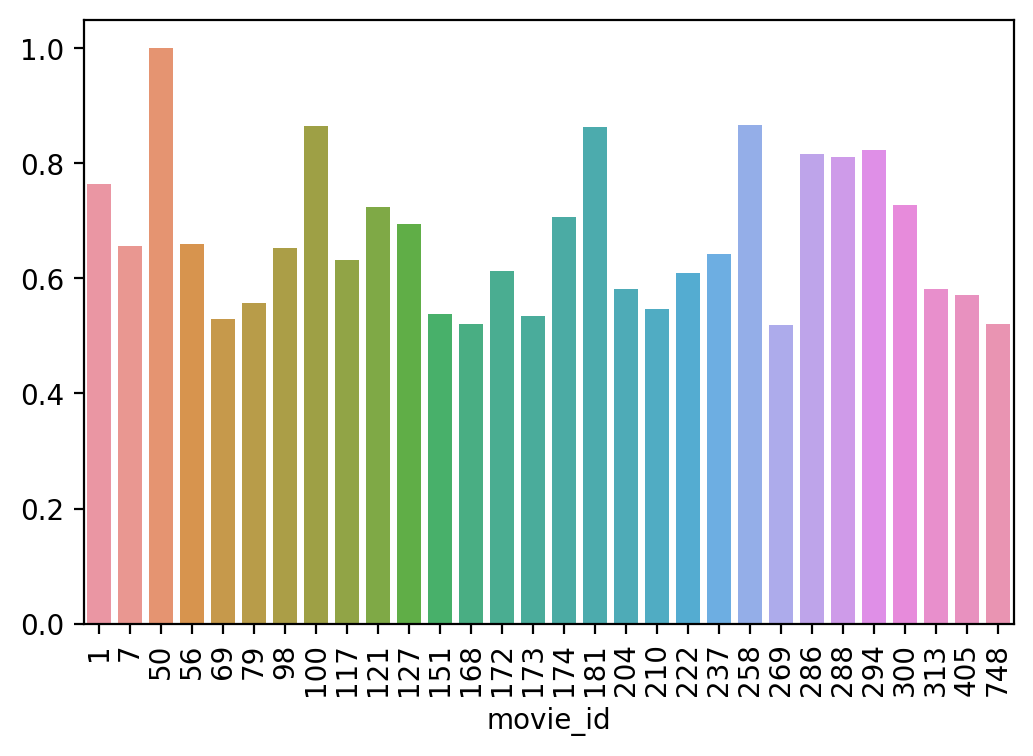

In [93]:
ms = df1['popularity'].sort_values(ascending=False)[:30]
plt.figure(dpi=200)
sns.barplot(ms.index, ms.values)
plt.xticks(rotation=90)
plt.show()

In [94]:
df1.head()

,popularity
movie_id,
1,0.764811
2,0.188510
3,0.114901
4,0.328546
5,0.107720


In [105]:
df.head()

,rating
movie_id,
242,3
302,3
377,1
51,2
346,1


In [103]:
rating = pd.merge(df, df1, on='movie_id')

In [104]:
rating.head()

,rating,popularity
movie_id,,
242,3,0.163375
242,3,0.163375
242,5,0.163375
242,3,0.163375
242,5,0.163375


In [106]:
df.shape

(100000, 1)

In [107]:
df1.shape

(858, 1)

In [108]:
rating.shape

(93146, 2)

In [112]:
rating.loc[50, ].head()

,rating,popularity
movie_id,,
50,5,1.0
50,4,1.0
50,5,1.0
50,5,1.0
50,5,1.0


In [113]:
sum([1, 1, 1, 1,1 ,1, ])/6

1.0

In [115]:
rating = rating.groupby(level=0).agg({
    'rating': np.mean,
    'popularity': np.mean
    
})

In [117]:
rating.head()

,rating,popularity
movie_id,,
1,3.878319,0.764811
2,3.206107,0.188510
3,3.033333,0.114901
4,3.550239,0.328546
5,3.302326,0.107720


In [118]:
!head ml-100k/u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

u.item 

            -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.

In [131]:
names = [ 'movie_id', 'movie title', 'Action', 'Adventure', 'Animation', 
          "Children's", "Comedy", "Crime", "Documentary", "Drama",  "Fantasy", 
          "Film-Noir", "Horror", "Musical",  "Mystery", "Romance", "Sci-Fi",
          "Thriller", "War", "Western" ]
cols = [ 0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [134]:
movie = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin1', header=None,
                   usecols=cols, names=names, index_col='movie_id')

In [135]:
movie.head()

,movie title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


##### movie_name[50] -> name

In [136]:
movie_name = movie[['movie title']]

In [138]:
movie_name.loc[50]

movie title    Star Wars (1977)
Name: 50, dtype: object

In [143]:
rating[rating['popularity'] == 0 ].head(1)

,rating,popularity
movie_id,,
6,3.576923,0.0


In [144]:
movie_name.loc[6]

movie title    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
Name: 6, dtype: object

In [146]:
movie.drop('movie title', axis=1, inplace=True)

In [147]:
movie.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [148]:
features = pd.merge(rating, movie, on='movie_id')

In [149]:
features.head()

,rating,popularity,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,
1,3.878319,0.764811,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.206107,0.188510,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.033333,0.114901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.550239,0.328546,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,3.302326,0.107720,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
https://colab.research.google.com/drive/1lY8M8-NgCj7o54NSTjxwkOMYonIXLFFH?usp=sharing

In [150]:
from tqdm import tqdm
from time import sleep

In [152]:
for _ in tqdm(range(100)):
    sleep(1)

100%|███████████████████████████████████████████████████████████████████████| 100/100 [01:40<00:00,  1.00s/it]


    Recommandation -> features 

In [153]:
features.head()

,rating,popularity,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,
1,3.878319,0.764811,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.206107,0.188510,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.033333,0.114901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.550239,0.328546,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,3.302326,0.107720,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


`Feature Elimination or Feature Selection`

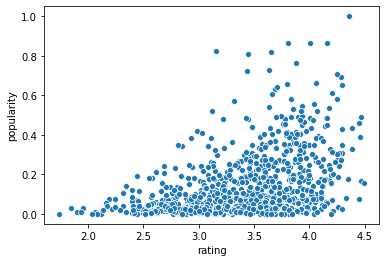

In [155]:
sns.scatterplot('rating', 'popularity', data=features)
plt.show()

In [156]:
np.corrcoef(features['rating'], features['popularity'])


array([[1.        , 0.40816709],
       [0.40816709, 1.        ]])

for rating and popularity the `distance matrix` will be `Euclidean Distance`

$$ d_i \quad = \quad \sqrt { {(x_o - x_i)}^2 + {(y_o - y_i)^2}  } $$

here $x_o$ and $y_o$ are observed point

for geners the `distance matrix` will be `cosine matrix`

$$ \text {Cosine Distance} \quad = \quad \frac { \sum\limits_{i=1}^N \quad x_i. y_i }  { \sqrt { \sum\limits_{i=1}^N \quad x_i^2 }  \sqrt  { \sum\limits_{i=1}^N \quad y_i^2} } $$

In [158]:
v1 = np.array([ 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [159]:
v2 = np.array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [163]:
np.sqrt(((v2-v1)**2).sum())

3.0

In [164]:
from scipy.spatial.distance import euclidean, cosine

In [165]:
euclidean(v1, v2)

3.0

In [166]:
cosine(v1, v2)

0.8174258141649446

In [167]:
m1 = features.loc[50]

In [168]:
m2 = features.loc[1]

In [172]:
euclidean(m1, m2)

2.8785202391928673

In [173]:
cosine(m1, m2)

0.1811665172202125

In [174]:
euclidean(m1[:2], m2[:2])

0.5346763202564353

In [177]:
cosine(m1[:2], m2[:2])

0.0004752149720865795

In [175]:
euclidean(m1[2:], m2[2:])

2.8284271247461903

In [176]:
cosine(m1[2:], m2[2:])

1.0

In [178]:
cosine(m1[2:], m2[2:]) + euclidean(m1[:2], m2[:2])

1.5346763202564353

In [179]:
target = movie_name

In [180]:
target.head()

,movie title
movie_id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


In [219]:
def distance(mid_1, mid_2):
    m1 = features.loc[mid_1]
    m2 = features.loc[mid_2]
    rp_dis = euclidean(m1[:2], m2[:2])
    gen_dis = cosine(m1[2:], m2[2:])
    return rp_dis + gen_dis
    

In [220]:
distance(3, 50)

2.593562511080913

In [224]:
def similar_movies(mid, k=5):
    neighbours = []
    for new_id in features.index:
        if mid != new_id:
            d = distance(mid, new_id)
            name = movie_name.loc[new_id]['movie title']
            neighbours.append( (d, name) )
    neighbours.sort()
    return [ name for d, name in neighbours[:k]]

In [234]:
similar_movies(50, k=10)

['Return of the Jedi (1983)',
 'Empire Strikes Back, The (1980)',
 'Raiders of the Lost Ark (1981)',
 'Princess Bride, The (1987)',
 'African Queen, The (1951)',
 'Titanic (1997)',
 'Indiana Jones and the Last Crusade (1989)',
 'Aliens (1986)',
 'Star Trek: First Contact (1996)',
 'Braveheart (1995)']

In [229]:
movie_name[movie_name['movie title'].str.startswith('God')]

,movie title
movie_id,
127,"Godfather, The (1972)"
187,"Godfather: Part II, The (1974)"


In [233]:
similar_movies(127, k=10)

['Godfather: Part II, The (1974)',
 'Pulp Fiction (1994)',
 'Titanic (1997)',
 'Fargo (1996)',
 'Braveheart (1995)',
 'Raiders of the Lost Ark (1981)',
 'Silence of the Lambs, The (1991)',
 'Empire Strikes Back, The (1980)',
 'GoodFellas (1990)',
 "One Flew Over the Cuckoo's Nest (1975)"]

Semi-Supervise 

    numpy, matplotlib, seaborn, pandas, scipy